In [1]:
import pandas as pd
import numpy as np

# Cnnformação dos Dados
data = pd.read_csv('clustering_data.csv' ,header = None)

In [2]:
X = np.matrix(data.values)

In [3]:
def normal(x, mi, sig):
    return (2*np.pi)**(-mi.shape[1]/2.0)*(np.linalg.det(sig))**(-1/2) * np.exp(-1/2 * (x - mi) @ np.linalg.pinv(sig) @ (x - mi).T)

In [4]:
def EM(K, pis, mis, sigs, epochs = 100):

    loglikelihoods = []
    
    for epoch in range(epochs):

        r = np.zeros((X.shape[0], K))

        # Passo E
        for k in range(K):
            r[:, k] = (pis[k] * np.apply_along_axis(normal, 1, X, mis[k], sigs[k])) / sum([pis[klinha] * np.apply_along_axis(normal, 1, X, mis[klinha], sigs[klinha]) for klinha in range(K)])

        # Passo M
        pis = r.sum(axis = 0)/X.shape[0]
        for k in range(K):
            mis[k] = (r[:, k].T @ X) / r[:, k].sum()
            a = np.zeros((2, 2))
            for i in range(X.shape[0]):
                a += (r[i, k] * (X[i, :] - mis[k]).T @ (X[i, :] - mis[k]))
            sigs[k] = a/r[:, k].sum()

        loglikelihood = (r @ np.log(pis)).sum() + (r[:, k] @ np.apply_along_axis(normal, 1, X, mis[k], sigs[k]).T).sum()
        loglikelihoods.append(loglikelihood)

    return pis, mis, sigs, r, loglikelihoods

In [5]:
# K-means
K = 8
pis = [1/K]*K
mis = [
    np.matrix([[-8,-9]]),
    np.matrix([[-11,-11]]),
    np.matrix([[7,10]]),
    np.matrix([[6,1]]),
    np.matrix([[4,0]]),
    np.matrix([[-10,7]]),
    np.matrix([[10,-5]]),
    np.matrix([[10,5]])
]
sigs = [np.matrix(np.eye(X.shape[1]))*19]*K

loglikelihoods = []

In [6]:
pis, mis, sigs, r, loglikelihoods = EM(K, pis, mis, sigs, epochs = 30)

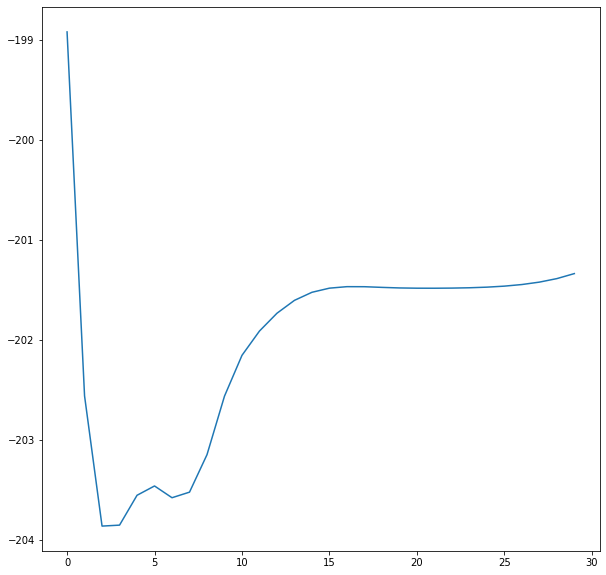

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = [10,10])
ax.plot(loglikelihoods)

In [8]:
cdic = ['blue','red','green','yellow','pink','grey', 'purple','black','cyan','orange']
cluster = np.argmax(r, axis=1)
colors = [cdic[i] for i in cluster]

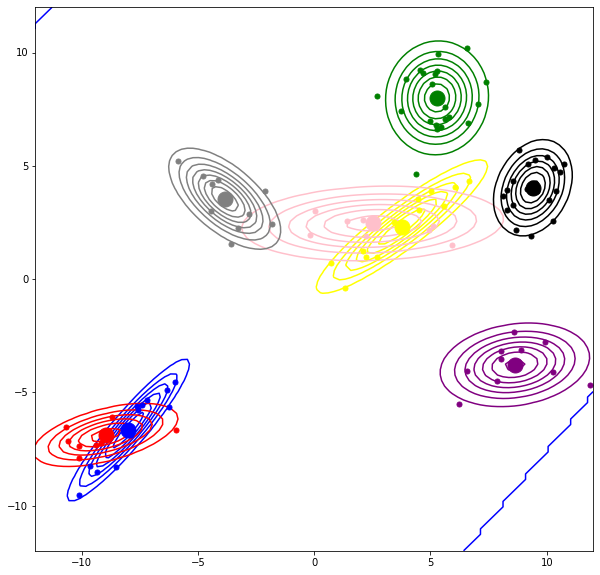

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.stats as st

# create a grid of (x,y) coordinates at which to evaluate the kernels
xlim = (-12, 12)
ylim = (-12, 12)
xres = 100
yres = 100

x = np.matrix(np.linspace(xlim[0], xlim[1], xres)).T
y = np.matrix(np.linspace(ylim[0], ylim[1], yres)).T
xx, yy = np.mgrid[-12:12:100j, -12:12:100j]
xxyy = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots(figsize = [10,10])

for k in range(K):
    mvnormal = multivariate_normal(
        mean=np.squeeze(np.array(mis[k])), cov=sigs[k]
    )
    z = mvnormal.pdf(xxyy)
    ax.contour(xx, yy, z.reshape((100,100)), colors=cdic[k]);
    ax.plot()
    ax.plot(mis[k][0, 0], mis[k][0, 1], linestyle = '', marker = 'o', markersize = 15, color = cdic[k])

for j in range(len(X)):
    ax.plot(X[j, 0], X[j, 1], linestyle = '', marker = 'o', markersize = 5, color = colors[j])
